In [1]:
import cv2
import numpy as np

In [2]:
import os
import time
os.listdir('/home/rob/HWR/datasets/zooniverse/220105')
fp = '/home/rob/HWR/datasets/zooniverse/220105/Preview002.jpg'


[INFO] loading EAST text detector...
[INFO] text detection took 4.086599 seconds


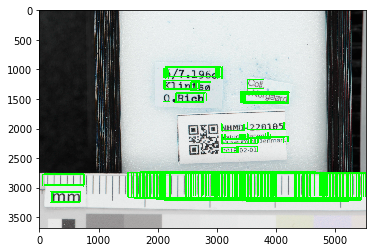

In [26]:
import matplotlib.pyplot as plt
show_image = True


# load the input image and grab the image dimensions
image = cv2.imread(fp)
orig = image.copy()
(H, W) = image.shape[:2]
(H/32,W/32)

# set the new width and height and then determine the ratio in change
# for both the width and height
(newW, newH) = (11*32*4, 7*32*4)
rW = W / float(newW)
rH = H / float(newH)

# resize the image and grab the new image dimensions
image = cv2.resize(image, (newW, newH))
(H, W) = image.shape[:2]    

# define the two output layer names for the EAST detector model that
# we are interested -- the first is the output probabilities and the
# second can be used to derive the bounding box coordinates of text
layerNames = ["feature_fusion/Conv_7/Sigmoid","feature_fusion/concat_3"]
# load the pre-trained EAST text detector
print("[INFO] loading EAST text detector...")
net = cv2.dnn.readNet('frozen_east_text_detection.pb')

# construct a blob from the image and then perform a forward pass of
# the model to obtain the two output layer sets
blob = cv2.dnn.blobFromImage(image, 1.0, (W, H), (130,130,130), swapRB=True, crop=False)
start = time.time()
net.setInput(blob)
(scores, geometry) = net.forward(layerNames)
end = time.time()

# show timing information on text prediction
print("[INFO] text detection took {:.6f} seconds".format(end - start))
# grab the number of rows and columns from the scores volume, then
# initialize our set of bounding box rectangles and corresponding
# confidence scores
(numRows, numCols) = scores.shape[2:4]
rects = []
confidences = []

# loop over the number of rows
for y in range(0, numRows):
    # extract the scores (probabilities), followed by the geometrical
    # data used to derive potential bounding box coordinates that
    # surround text
    scoresData = scores[0, 0, y]
    xData0 = geometry[0, 0, y]
    xData1 = geometry[0, 1, y]
    xData2 = geometry[0, 2, y]
    xData3 = geometry[0, 3, y]
    anglesData = geometry[0, 4, y]


    # loop over the number of columns
    for x in range(0, numCols):
        # if our score does not have sufficient probability, ignore it
        if scoresData[x] < 0.8:
            continue

        # compute the offset factor as our resulting feature maps will
        # be 4x smaller than the input image
        (offsetX, offsetY) = (x * 4.0, y * 4.0)

        # extract the rotation angle for the prediction and then
        # compute the sin and cosine
        angle = anglesData[x]
        cos = np.cos(angle)
        sin = np.sin(angle)

        # use the geometry volume to derive the width and height of
        # the bounding box
        h = xData0[x] + xData2[x]
        w = xData1[x] + xData3[x]

        # compute both the starting and ending (x, y)-coordinates for
        # the text prediction bounding box
        endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
        endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
        startX = int(endX - w)
        startY = int(endY - h)

        # add the bounding box coordinates and probability score to
        # our respective lists
        rects.append((startX, startY, endX, endY))
        confidences.append(scoresData[x])

if show_image == True:
    # loop over the bounding boxes
    for (startX, startY, endX, endY) in rects:
        # scale the bounding box coordinates based on the respective
        # ratios
        startX = int(startX * rW)
        startY = int(startY * rH)
        endX = int(endX * rW)
        endY = int(endY * rH)

        # draw the bounding box on the image
        cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 2)

    # show the output image
    plt.imshow(orig)
    cv2.waitKey(0)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


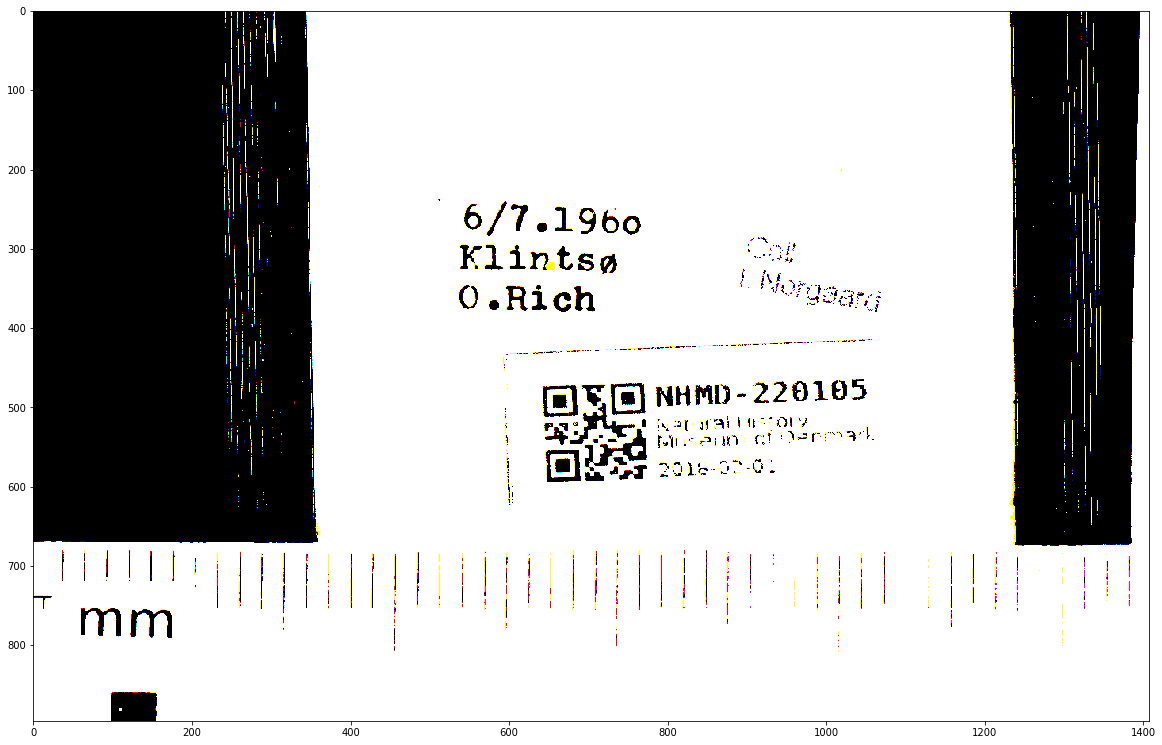

In [27]:
plt.figure(figsize=(20,20))
plt.imshow(blob[0].swapaxes(0,2).swapaxes(0,1))

[INFO] loading EAST text detector...
[INFO] text detection took 4.338758 seconds


([(543, 227, 793, 271),
  (542, 230, 787, 274),
  (542, 230, 790, 274),
  (543, 231, 791, 276),
  (543, 233, 792, 278),
  (543, 235, 791, 280),
  (543, 234, 789, 280),
  (543, 236, 787, 281),
  (543, 234, 784, 280),
  (543, 235, 781, 280),
  (544, 235, 781, 281),
  (544, 235, 779, 281),
  (545, 235, 777, 281),
  (546, 234, 777, 279),
  (546, 234, 775, 279),
  (545, 234, 773, 278),
  (548, 235, 772, 278),
  (549, 235, 772, 278),
  (551, 236, 772, 279),
  (552, 236, 772, 278),
  (552, 236, 771, 278),
  (552, 236, 770, 278),
  (552, 236, 769, 278),
  (551, 236, 768, 278),
  (550, 237, 769, 279),
  (549, 237, 772, 279),
  (547, 237, 771, 279),
  (545, 236, 772, 278),
  (545, 236, 772, 278),
  (542, 237, 772, 278),
  (542, 238, 771, 278),
  (541, 237, 770, 277),
  (538, 238, 768, 278),
  (538, 239, 769, 278),
  (538, 238, 768, 278),
  (539, 238, 767, 278),
  (542, 239, 769, 279),
  (543, 240, 770, 279),
  (542, 240, 770, 280),
  (540, 240, 769, 280),
  (538, 241, 769, 280),
  (537, 240, 769

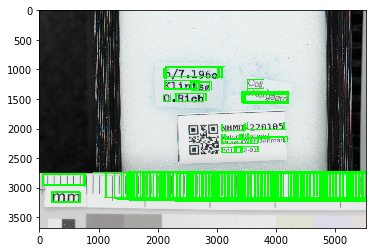

In [5]:
detect_text(fp, show_image=True)

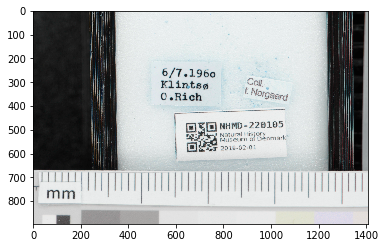

In [11]:
plt.imshow(image)
plt.show()

[INFO] loading EAST text detector...
[INFO] text detection took 4.259690 seconds


-1

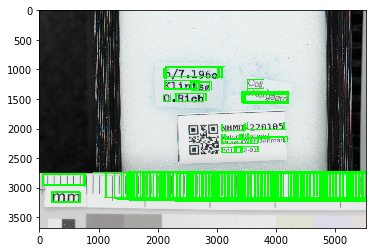